## Problem Description

Leveraging customer information is paramount for most businesses. <br>
In the case of an insurance company, attributes of customers such as age, gender, bmi, etc. can be crucial in making business decisions. Hence, knowing to explore and generate value out of such data can be an invaluable for some businesses. <br>

The objectivbes here are to perform exploratory data analysis (descriptive statistics and visualization) on the data, to perform some hypothesis testing to learn more about the customer characteristics that may be important to the business, and to build and evaluate a regression model to predict the insurance claim based on customer attributes.


In [1]:
# importing required libraries for EDA and statistical analysis
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data=pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Basic EDA
* Find the shape of the data, and data type of individual columns
* Check the presence of missing values
* Check and drop duplicated rows
* Descriptive statistics (measure of central tendency and disperssion) of numerical columns
* Find the distribution of the numerical columns and the associated skewness and presence of outliers
* Distribution of categorical columns

In [3]:
print('The data contains {} observation with {} attributes'.format(*data.shape))

The data contains 1338 observation with 7 attributes


In [4]:
# A summary of data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# number of unique values in each column
data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [6]:
# checking the number of missing values in each column
data.isna().apply(pd.value_counts)

,age,sex,bmi,children,smoker,region,charges
False,1338,1338,1338,1338,1338,1338,1338


In [7]:
# another way to check if there is a missing value in each column
data.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [8]:
# Checking for duplicated observation that can bias the data
data.duplicated().any()

True

In [9]:
# The previous cell output shows existrance of duplicated observation we can see how many duplicate we have
data.duplicated().sum()

1

In [10]:
# dropping the duplicated row
data.drop_duplicates(inplace=True)

In [11]:
data.shape

(1337, 7)

In [12]:
# data type of each attribute:

data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [13]:
# Summary statsitics of numerical columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


In [14]:
# list of numerical attributes:
num_col=data.select_dtypes(np.number).columns
num_col

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [15]:
# list of categorical attributes:
cat_col=data.select_dtypes('object').columns
cat_col

Index(['sex', 'smoker', 'region'], dtype='object')

<b>Comments:</b> children column can be treated as categorical data as well. For now it is treated as discrete numerical attribute

In [16]:
# five point summary of the numerical attributes:

data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


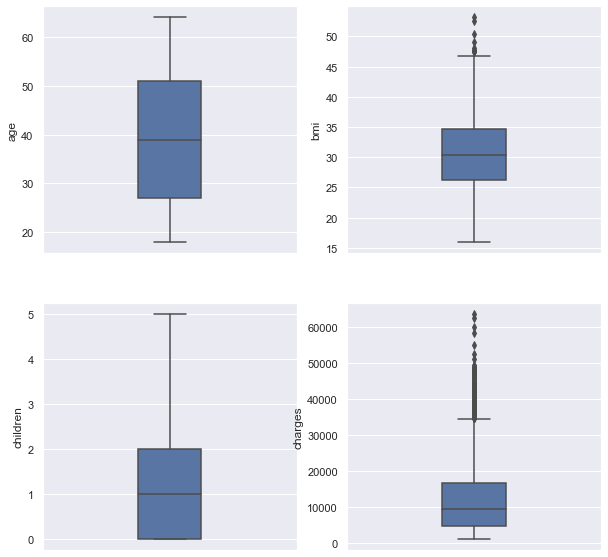

In [17]:
# visual presentation of five point summary using box plot

f,ax=plt.subplots(2,2,figsize=(10,10))
for i,col in enumerate(num_col):
    sns.boxplot(data=data, y=col, ax=ax[i//2, i%2], width=0.25)

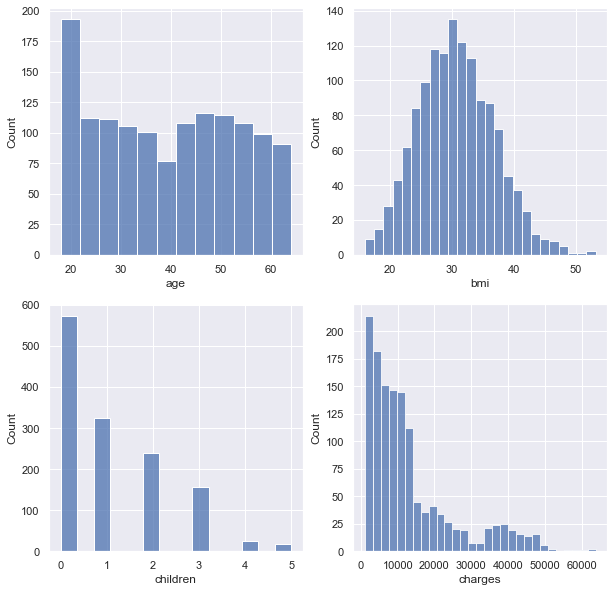

In [18]:
# histogram of different numerical variables

f, ax=plt.subplots(2,2,figsize=(10,10))
for i,col in enumerate(num_col):
    sns.histplot(data=data, x=col, ax=ax[i//2, i%2])

In [19]:
skewness={
    k:v for k,v in zip(['age','bmi','charges'], stats.skew(data[['age','bmi','charges']].values))
}

In [20]:
for k,v in skewness.items():
    print(f"Skewness of {k}: {v:.3f}")

Skewness of age: 0.055
Skewness of bmi: 0.284
Skewness of charges: 1.514


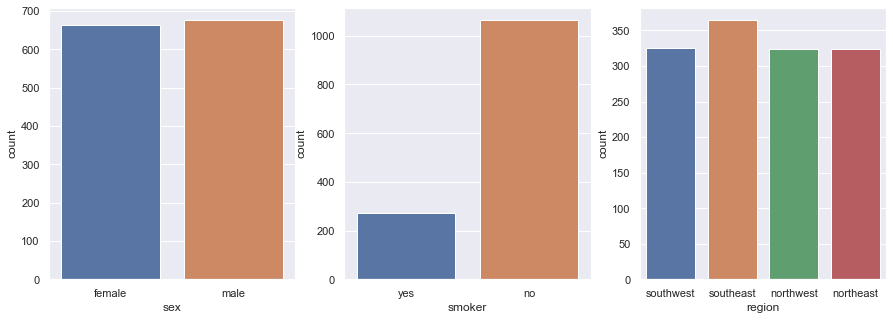

In [21]:
# categorical data EDA:
# count of different category in the data
f,ax=plt.subplots(1,3,figsize=(15,5))
for i,col in enumerate(cat_col):
    sns.countplot(data=data, x=col, ax=ax[i])

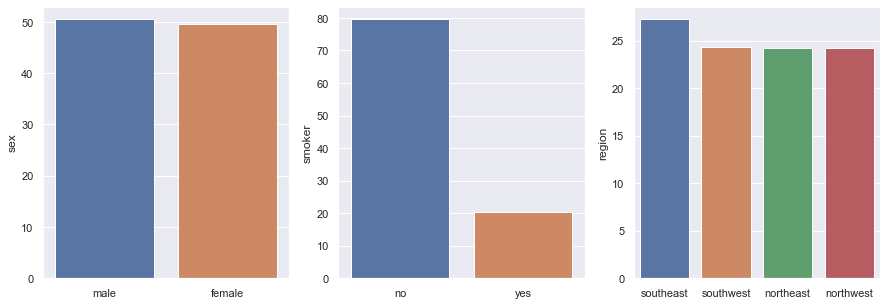

In [22]:
# finding the proportions of different category in the data
f,ax=plt.subplots(1,3,figsize=(15,5))
for i,col in enumerate(cat_col):
    counts=data[col].value_counts(normalize=True).mul(100)
    sns.barplot(x=counts.index, y=counts, ax=ax[i]);

<b>Comments:</b> The sample is not balanced for smoker/non-smoker customers

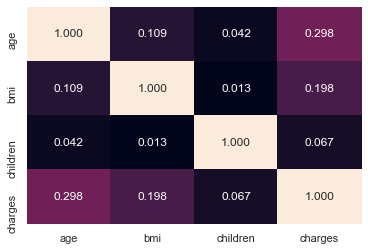

In [23]:
# Bivariate EDA:
sns.heatmap(data[num_col].corr(), annot=True, cbar=False, fmt='.3f');

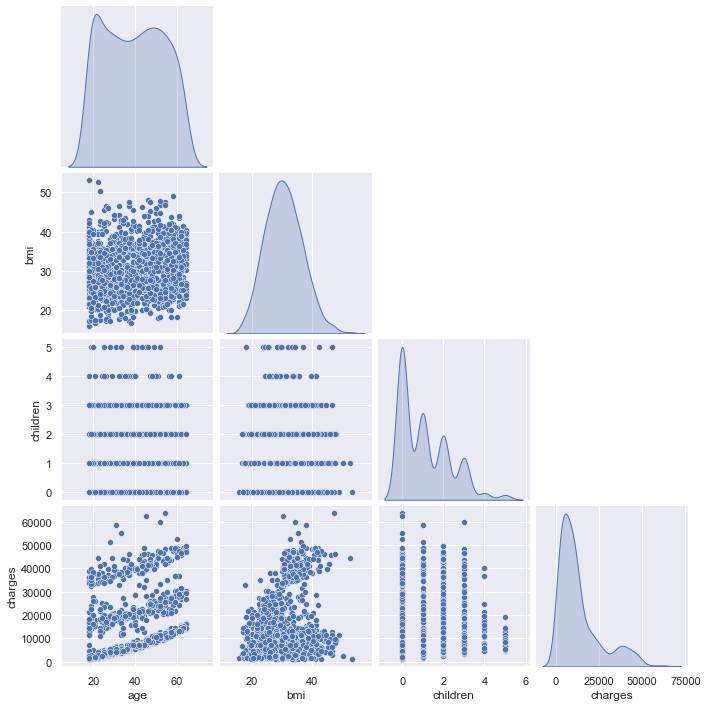

In [24]:
sns.pairplot(data[num_col], diag_kind='kde', corner=True);

<b>Comment:</b> There is nnot strong correlation among numerical variables

In [25]:
# bivariate EDA for categorical data (contingency table)
pd.crosstab(data['sex'], data['smoker'])

smoker,no,yes
sex,,
female,547,115
male,516,159


In [26]:
pd.crosstab(data['region'], data['smoker'])

smoker,no,yes
region,,
northeast,257,67
northwest,266,58
southeast,273,91
southwest,267,58


## Inferential Statistics

We would like to use hypothesis tests to infere on customer population. The level of significance is 0.05

In [27]:
# Question: Does being smoker afect the insurance charge of customers?

st, pval=stats.ttest_ind(data[data['smoker']=='yes']['charges'], data[data['smoker']=='no']['charges'])
if pval>0.05:
    print('Being smoker does not have any effect on insurance chargers', pval)
else:
    print('Being smoker significantly affcet the insurance charges', pval)

Being smoker significantly affcet the insurance charges 1.4067220949376498e-282


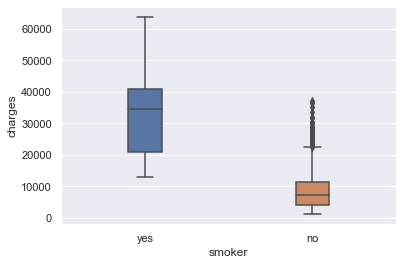

In [28]:
# checking it visually as well
sns.boxplot(data=data, x='smoker', y='charges', width=0.2);

In [29]:
# Question: Is bmi different according to gender?

st, pval=stats.ttest_ind(data[data['sex']=='male']['bmi'], data[data['sex']=='female']['bmi'])
if pval>0.05:
    print('Gender does not have significant effect on bmi', pval)
else:
    print('Gender has significant effcet on bmi', pval)

Gender does not have significant effect on bmi 0.08991704324931137


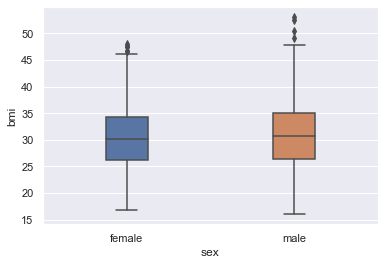

In [30]:
# checking it visually as well
sns.boxplot(data=data, x='sex', y='bmi', width=0.25);

In [31]:
# Question: Is the insurance charge diferent among regions?
data_region=[]
for i,region in enumerate(data['region'].unique()):
    data_region.append(data[data['region']==region]['charges'])

st,pval=stats.f_oneway(*data_region)
if pval>0.05:
    print('The insurance charge is not different among regions', pval)
else:
    print('The insurance charge is significantly different among regions', pval)

The insurance charge is significantly different among regions 0.03276288025444947


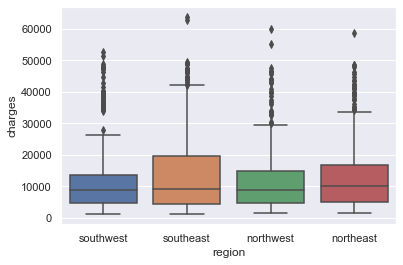

In [32]:
# checking it visually as well
sns.boxplot(data=data, x='region', y='charges');

In [33]:
# post-hoc analysis:
print(pairwise_tukeyhsd(data['charges'], data['region']))

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
  group1    group2   meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------------
northeast northwest  -955.5437 0.7203 -3397.7483  1486.661  False
northeast southeast  1329.0269 0.4755 -1045.1363 3703.1902  False
northeast southwest -1059.4471 0.6584 -3499.7724 1380.8781  False
northwest southeast  2284.5706 0.0644   -89.5927 4658.7338  False
northwest southwest  -103.9035    0.9 -2544.2288 2336.4218  False
southeast southwest -2388.4741 0.0477 -4760.7041  -16.2441   True
-----------------------------------------------------------------


<b>Comment:</b> There is statistical difference between southeast and southwest insurance charges

In [34]:
# Question does the number of children has any effect on insurance charges?
# for this question we can treat number of children as a categorical data
data_children=[]
for i,child in enumerate(data['children'].unique()):
    data_children.append(data[data['children']==child]['charges'].values)

st,pval=stats.f_oneway(*data_children)
if pval>0.05:
    print('The insurance charge is not affected by the number of children', pval)
else:
    print('The insurance charge is significantly different based on number of children', pval)

The insurance charge is significantly different based on number of children 0.006133448188169501


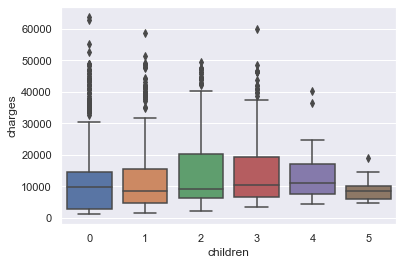

In [35]:
# checking it visually as well
sns.boxplot(data=data, x='children', y='charges');

In [36]:
# post-hoc analysis:
print(pairwise_tukeyhsd(data['charges'], data['children']))

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj     lower      upper   reject
------------------------------------------------------------
     0      1   346.4765    0.9  -2045.7212 2738.6742  False
     0      2  2688.8684 0.0439     42.7273 5335.0095   True
     0      3   2970.623 0.0694    -129.543  6070.789  False
     0      4   1465.961    0.9  -5565.6354 8497.5573  False
     0      5 -3598.6601 0.7889 -11836.8317 4639.5115  False
     1      2  2342.3919 0.2025   -588.5829 5273.3667  False
     1      3  2624.1465 0.2212   -722.4308 5970.7239  False
     1      4  1119.4845    0.9  -6024.1769 8263.1459  False
     1      5 -3945.1366 0.7287 -12279.1645 4388.8914  False
     2      3   281.7546    0.9  -3250.8128 3814.3221  False
     2      4 -1222.9074    0.9  -8455.5661 6009.7512  False
     2      5 -6287.5285 0.2706 -14697.9669   2122.91  False
     3      4 -1504.6621    0.9  -8915.4864 5906.1623  False
     3      5 -6569.2831

<b>Comment:</b> customer with no child and 2 children are significantly different other groups are not

In [37]:
# Question: Is being smoker different between genders?

observed=pd.crosstab(data['smoker'], data['sex'])
st,pval,*_=stats.chi2_contingency(observed)
if pval>0.05:
    print('Being smoker is not different between genders', pval)
else:
    print('Being smoker is significantly different between genders', pval)

Being smoker is significantly different between genders 0.0062765550120107375


In [38]:
# Question: Is female bmi different based on number of children? Check 0, 1, and 2 only

st, pval=stats.f_oneway(data[(data['sex']=='female') & (data['children']==0)]['bmi'], 
               data[(data['sex']=='female') & (data['children']==1)]['bmi'], 
               data[(data['sex']=='female') & (data['children']==2)]['bmi'])
if pval>0.05:
    print('BMI is not different among femails with 0, 1 and 2 children', pval)
else:
    print('BMI is significantly different among femails with 0, 1 and 2 children', pval)

BMI is not different among femails with 0, 1 and 2 children 0.7158579926754841


In [39]:
# Question: Is being smoker different among regions?

st, pval, *_=stats.chi2_contingency(pd.crosstab(data["smoker"], data["region"]))
if pval>0.05:
    print('Being smoker is not different among regions', pval)
else:
    print('Being smoker is significantly different among regions', pval)

Being smoker is not different among regions 0.06354826573182332


# Predictive Modeling

In [40]:
# import libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline

In [41]:
# encoding categorical data:
data['children']=data['children'].astype('category')
data=pd.get_dummies(data, drop_first=True)

In [42]:
# splitting data to features and labels
X=data.drop('charges',axis=1)
y=data['charges']

In [43]:
# splitting to train and test sets
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [44]:
model=LinearRegression()
model.fit(x_train,y_train)
model.score(x_test, y_test)

0.7541814960286375

In [45]:
model_ridge=Ridge()
model_ridge.fit(x_train, y_train)
model_ridge.score(x_test, y_test)

0.7540768623890027

In [46]:
model_lasso=Lasso()
model_lasso.fit(x_train, y_train)
model_lasso.score(x_test, y_test)

0.7542114011156882

In [47]:
# Using ensemble methods to improve performance of the model
model=GradientBoostingRegressor(random_state=0)
model.fit(x_train,y_train)
model.score(x_test, y_test)

0.8457985043500019

<b>Comment:</b> Using gradient boosing improved the performance

In [48]:
# using polynomial feature to improve performance
# using Lasso to eliminate unimportant features
pipe=make_pipeline(
    PolynomialFeatures(degree=2, interaction_only=True),
    Lasso())
pipe.fit(x_train, y_train)
pipe.score(x_test, y_test)

0.8273056276444182

In [49]:
# number of eliminated features
np.sum(pipe['lasso'].coef_==0)

19

<b>Comment:</b> Adding higher order features helped as well